# ML - Laboratory 1: Naive Bayes Classifiers
## Santiago Álvarez Sepúlveda
## e-mail: saalvarezse@unal.edu.co


### Generating some training data

Each indiviudal has two atributes (x0,x1):
* x0 is heigth
* x1 is weight

There are two clases of individuals:
* Babies
* Teens
* Adults

We generate training examples
* 50 babies ~ Gaussian([60, 30], [[50,15],[15, 30]])
* 70 teens ~ Gaussian([120, 50], [[90,10 ],[10, 40]])
* 120 adults ~ Gaussian([150, 80], [[60, 10],[10, 40]])



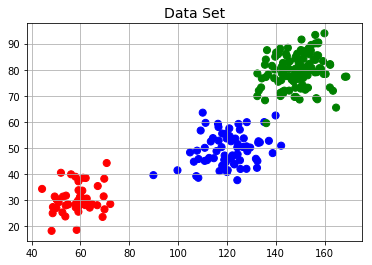

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate normally distributed random points of each class
babies = np.random.multivariate_normal([60, 30], [[50, 15],[15, 30]], 50)
teens  = np.random.multivariate_normal([120, 50], [[90, 10],[10, 40]], 70)
adults = np.random.multivariate_normal([150, 80], [[60, 10],[10, 40]], 120)

# Create trainning labels and trainning set 
y1 = np.empty(len(babies))
y2 = np.empty(len(teens))
y3 = np.empty(len(adults))
y1.fill(0)
y2.fill(1)
y3.fill(2)
y = np.concatenate((y1, y2, y3),axis=0)
x = np.concatenate((babies, teens, adults),axis=0)

# Draw the data set
color= ['red' if v == 0 else ('blue' if v == 1 else 'green') for v in y]
plt.scatter(x[:,0], x[:,1],  c=color, s=50)
plt.title('Data Set', size=14), plt.grid()
plt.show()

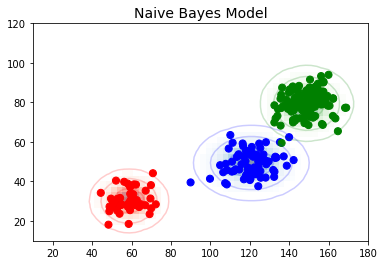

In [11]:
# Draw the Naive Bayes Model
fig, ax = plt.subplots()
color= ['red' if v == 0 else ('blue' if v == 1 else 'green') for v in y]
ax.scatter(x[:,0], x[:,1],  c=color, s=50)
ax.set_title('Naive Bayes Model', size=14)
xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
for label, color in enumerate(['red', 'blue', 'green']):
    mask = (y == label)
    mu, std = x[mask].mean(0), x[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
ax.set(xlim=xlim, ylim=ylim);

In [12]:
# Train Naive Bayesian Model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x, y);

## The desicion boundary in Gaussian naive Bayes is quadratic.

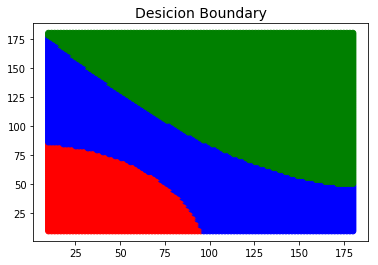

In [13]:
x0 =  np.linspace(10,180,101)
x1 =  np.linspace(10,180,101)
g = np.meshgrid(x0,x1)
xmesh = np.append(g[0].reshape(-1,1),g[1].reshape(-1,1),axis=1)
ymesh= model.predict(xmesh)
colormesh= ['red' if v == 0 else ('blue' if v == 1 else 'green') for v in ymesh]
plt.scatter(xmesh[:, 0], xmesh[:, 1], c=colormesh )
plt.title('Desicion Boundary', size=14);

## Testing the model with some random data

In [18]:
rng = np.random.RandomState(0)
xnew = [10, 10] + [180, 180] * rng.rand(500, 2) 
ynew = model.predict(xnew)

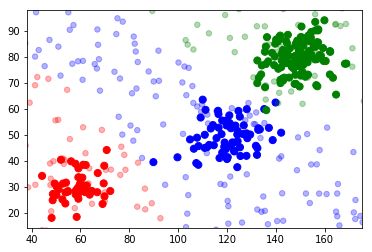

In [19]:
color= ['red' if v == 0 else ('blue' if v == 1 else 'green') for v in y]
plt.scatter(x[:,0], x[:,1],  c=color, s=50);
lim = plt.axis()

colornew= ['red' if v == 0 else ('blue' if v == 1 else 'green') for v in ynew]
plt.scatter(xnew[:, 0], xnew[:, 1], c=colornew, s=30,  alpha=0.3)
plt.axis(lim);

## Pobabilistic classification - posterior probabilities for the classes

In [20]:
xnew[-20:].round(2)

array([[ 49.62, 122.12],
       [ 30.07,  92.61],
       [ 68.02,  66.97],
       [ 96.87, 141.37],
       [ 22.45, 168.25],
       [142.27,  41.77],
       [179.05, 101.14],
       [189.97,  45.51],
       [106.28,  62.24],
       [ 64.75, 116.39],
       [175.91, 154.95],
       [140.31, 110.65],
       [176.01,  98.63],
       [167.29, 160.12],
       [ 48.49, 148.82],
       [ 12.19,  68.11],
       [ 51.32, 101.24],
       [142.63,  27.58],
       [102.69, 178.91],
       [ 51.16, 131.89]])

In [21]:
yprob = model.predict_proba(xnew[-20:])
yprob.round(2)

array([[0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.01, 0.99],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.86, 0.14],
       [0.  , 1.  , 0.  ],
       [0.  , 0.4 , 0.6 ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.14, 0.86]])